In [1]:
import pandas as pd
import bbi
import os
from matplotlib import pyplot as plt

In [2]:
folder_name = 'bigWig_files_and_visualizations' # specifies directory for files and visualizations
# change this to search through a different visualizations folder (see Format_Directory.ipynb)

## Graphing Setup
This cell lets you specify a target region, as well as the axis limits, plot color, and resolution of your graphs.

In [3]:
# interval is set in one line
start_coord, end_coord = 96320500, 96332500
chrom = 'chr7'
gene = "CITRIN"
bin_width = 75
organ_name = "Liver" # the folder that needs visualizations MUST BE FORMATTED BY Format_Directory.ipynb

# set limits for y-axis depending on tissue (to be specified by user) comment out axis_limits to get default ylim
# edit axis_limits to set ylimit and add new assays accordingly
# all assays in axis_limits need to be in plot_color
# axis_colors and plot_color are dictionaries where I can specify axies and colors for new datasets (txn factors ...). 
# folder names not listed in the 2 dictionaries will be plotted gray and will have the default y-axis
axis_limits = {"ATAC-Seq":[0,20],"Dnase-Seq":[0,10],"CTCF":[0,5],"RAD21":[0,20],"POLR2A":[0,25],"NR2F2":[0,50],"ATF3":[0,50],"FOXA2":[0,50], "ZBTB33":[0,50],"GABPA":[0,50],"TAF1":[0,50],"JUND":[0,50],"MAX":[0,50],"HNF4A":[0,50],"SP1":[0,50],"HNF4G":[0,50],"YY1":[0,50],"FOXA1":[0,50],"EGR1":[0,50],"REST":[0,50],"RXRA":[0,50]}
plot_color = {"ATAC-Seq":"#00CC00","Dnase-Seq":"#00CC00","CTCF":"#0080FF","RAD21":"#0080FF","POLR2A":"#FF9933","NR2F2":"#4C0099","ATF3":"#4C0099","FOXA2":"#4C0099","ZBTB33":"#4C0099","GABPA":"#4C0099","TAF1":"#4C0099","JUND":"#4C0099","MAX":"#4C0099","HNF4A":"#4C0099","SP1":"#4C0099","HNF4G":"#4C0099","YY1":"#4C0099","FOXA1":"#4C0099","EGR1":"#4C0099","REST":"#4C0099","RXRA":"#4C0099"}     









## Full Resolution Plots
Generates a full res file with default y-axis <br>
Directory must be formatted by Format_Directory, and must be in BigWigFiles. Run code to draw a single plot

In [ ]:

path = './'+folder_name+'/'
#organ_name = 'Liver' # the folder that needs visualizations MUST BE FORMATTED BY Format_Directory.ipynb

path = './'+folder_name+'/'+organ_name+'/'
experiments = list(filter(lambda x: x!=".ipynb_checkpoints" and ".png" not in x and ".pdf" not in x and ".svg" not in x and ".txt" not in x,os.listdir(path))) # handles annoying jupyter checkpoints

# start figure
figure_name = organ_name+'_visualizations_'+gene
fig = plt.figure(figsize=(5,15),dpi=200)
index = 1

# traverse all experiment folders in the organ folder
for experiment in experiments:
    path = folder_name+'/'+organ_name+'/'+experiment+'/'
    functions_assays = os.listdir(path)
    #print(functions_assays)
    for item in functions_assays:
        if item.startswith("."): 
            functions_assays.remove(item)
    #functions_assays = list(filter(lambda x: x!=".ipynb_checkpoints" and not x.startswith(".") ,os.listdir(path))) # handles annoying jupyter checkpoints
    #print(functions_assays)
    
    for function_assay in functions_assays:

        path = './'+folder_name+'/'+organ_name+'/'+experiment+'/'+function_assay+'/'
        bigwig_files = os.listdir(path)
        #print(bigwig_files)
        for item in bigwig_files:
            if item.startswith("."): 
                bigwig_files.remove(item)

        #print(bigwig_files)
        #bigwig_files = list(filter(lambda x: x!=".ipynb_checkpoints" and "._" not in x,os.listdir(path))) # handles annoying jupyter checkpoints
        
        # draw subplots from a bigWig file
        ax = fig.add_subplot(len(experiments),1,index)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.1)
        ax.spines['bottom'].set_linewidth(0.1)
        
        print(experiment, bigwig_files)
        
        # overlap plots onto the same subplot
        for bigwig_file in bigwig_files:

            f = bbi.open(path+bigwig_file)
            # Specified genomic region
            region = f.fetch(chrom, start_coord, end_coord)
            
            f.close()
            coords = [start_coord+x for x in range(len(region))]
            plt.plot(coords, region, linewidth = 0.0)
            
            plt.fill_between(coords, region, color="#808080", alpha=0.2)
            plt.yticks(fontsize=5)
               
            plt.xticks([])
            ax.yaxis.set_tick_params(width=0.1)
            plt.xlim([start_coord,end_coord])
            

    index += 1

# format subplot 
plt.subplots_adjust(top=0.4, bottom=0.01, left=0.10, right=0.95, hspace=0.5,wspace=0.5)
plt.savefig(figure_name+'_full_res.png')
plt.show()
# end figure

# move visualizations to the respective folder
os.rename('./'+figure_name+'_full_res.png', './'+folder_name+'/'+organ_name+'/'+figure_name+'_full_res.png')



RAD21 ['ENCFF320TFG.bigwig', 'ENCFF583XRF.bigwig', 'ENCFF967HUB.bigwig', 'ENCFF090YLB.bigwig', 'ENCFF693JPZ.bigwig', 'ENCFF533OJN.bigwig']
NR2F2 ['ENCFF100VAD.bigwig', 'ENCFF118HNM.bigwig', 'ENCFF555EAX.bigwig', 'ENCFF774NDG.bigwig']
ATF3 ['ENCFF393IOD.bigwig', 'ENCFF010HDV.bigwig', 'ENCFF582HWW.bigwig', 'ENCFF655FWJ.bigwig']
H3K9ac ['ENCFF860SWN.bigWig', 'ENCFF807IYO.bigWig']
H3K4me3 ['ENCFF517UOX.bigWig', 'ENCFF917LFF.bigWig', 'ENCFF962JEC.bigWig', 'ENCFF225HLK.bigWig', 'ENCFF053IVC.bigWig', 'ENCFF280QYJ.bigWig', 'ENCFF372NAI.bigWig']
POLR2A ['ENCFF263FLJ.bigWig']
FOXA2 ['ENCFF671MZY.bigwig', 'ENCFF967URE.bigwig', 'ENCFF629YJJ.bigwig', 'ENCFF459VUB.bigwig']
ZBTB33 ['ENCFF023BDY.bigwig', 'ENCFF053DPE.bigwig', 'ENCFF840UIZ.bigwig', 'ENCFF845VRZ.bigwig']
Dnase-Seq ['ENCFF082KAC.bigWig', 'ENCFF412PVV.bigWig', 'ENCFF634BMR.bigWig', 'ENCFF020EPF.bigWig', 'ENCFF466DQD.bigWig', 'ENCFF606YDZ.bigWig']
GABPA ['ENCFF022DTJ.bigwig', 'ENCFF005DZP.bigwig', 'ENCFF372BFD.bigwig', 'ENCFF946RTH.bigwig'

Command to remove .DS_Store files


``` find . -name '.DS_Store' -type f -print ```


This will show the files


``` find . -name '.DS_Store' -type f -delete ```


This will delete the files in directories in and below the current working directory


https://jonbellah.com/articles/recursively-remove-ds-store

## Downsampled Plots
The amount of downsampling, colors, and y-axes are specified in the Graphing Setup Cell

RAD21 ['ENCFF320TFG.bigwig', 'ENCFF583XRF.bigwig', 'ENCFF967HUB.bigwig', 'ENCFF090YLB.bigwig', 'ENCFF693JPZ.bigwig', 'ENCFF533OJN.bigwig']
NR2F2 ['ENCFF100VAD.bigwig', 'ENCFF118HNM.bigwig', 'ENCFF555EAX.bigwig', 'ENCFF774NDG.bigwig']
ATF3 ['ENCFF393IOD.bigwig', 'ENCFF010HDV.bigwig', 'ENCFF582HWW.bigwig', 'ENCFF655FWJ.bigwig']
H3K9ac ['ENCFF860SWN.bigWig', 'ENCFF807IYO.bigWig']
H3K4me3 ['ENCFF517UOX.bigWig', 'ENCFF917LFF.bigWig', 'ENCFF962JEC.bigWig', 'ENCFF225HLK.bigWig', 'ENCFF053IVC.bigWig', 'ENCFF280QYJ.bigWig', 'ENCFF372NAI.bigWig']
POLR2A ['ENCFF263FLJ.bigWig']
FOXA2 ['ENCFF671MZY.bigwig', 'ENCFF967URE.bigwig', 'ENCFF629YJJ.bigwig', 'ENCFF459VUB.bigwig']
ZBTB33 ['ENCFF023BDY.bigwig', 'ENCFF053DPE.bigwig', 'ENCFF840UIZ.bigwig', 'ENCFF845VRZ.bigwig']
Dnase-Seq ['ENCFF082KAC.bigWig', 'ENCFF412PVV.bigWig', 'ENCFF634BMR.bigWig', 'ENCFF020EPF.bigWig', 'ENCFF466DQD.bigWig', 'ENCFF606YDZ.bigWig']
GABPA ['ENCFF022DTJ.bigwig', 'ENCFF005DZP.bigwig', 'ENCFF372BFD.bigwig', 'ENCFF946RTH.bigwig'

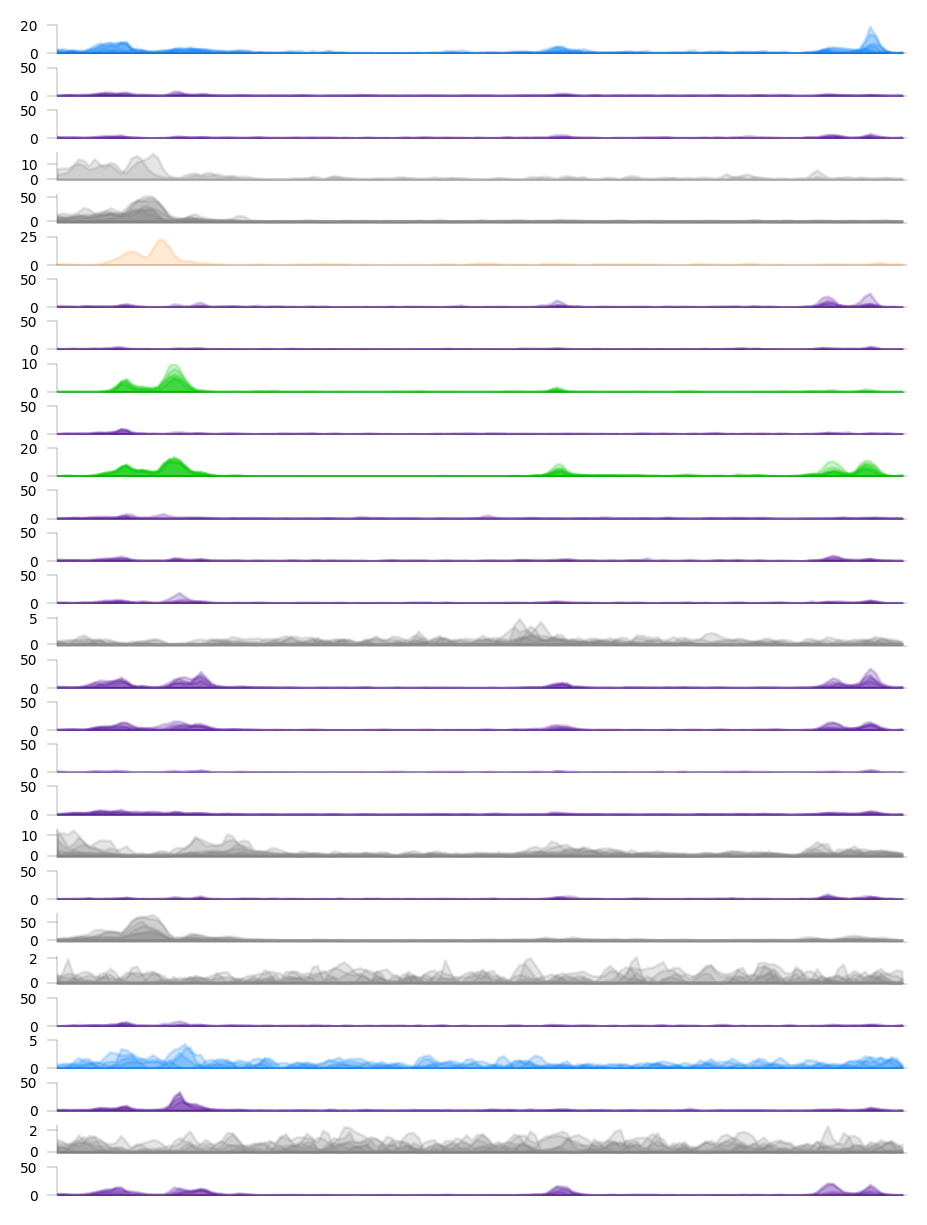

In [86]:
path = './'+folder_name+'/'
#organ_name = 'Lung' # the folder that needs visualizations MUST BE FORMATTED BY Format_Directory.ipynb
g = open(organ_name+"_plot_order_"+gene+".txt","w")
path = './'+folder_name+'/'+organ_name+'/'
experiments = list(filter(lambda x: x!=".ipynb_checkpoints" and ".png" not in x and ".pdf" not in x and ".svg" not in x and ".txt" not in x,os.listdir(path))) # handles annoying jupyter checkpoints

# start figure
figure_name = organ_name+'_visualizations_'+gene
fig = plt.figure(figsize=(5,15),dpi=200)
index = 1

# traverse all experiment folders in the organ folder
for experiment in experiments:
    path = './'+folder_name+'/'+organ_name+'/'+experiment+'/'
    functions_assays = os.listdir(path)
    #print(functions_assays)
    for item in functions_assays:
        if item.startswith("."): 
            functions_assays.remove(item)
    #functions_assays = list(filter(lambda x: x!=".ipynb_checkpoints" and not x.startswith(".") ,os.listdir(path))) # handles annoying jupyter checkpoints
    #print(functions_assays)
    
    for function_assay in functions_assays:

        path = './'+folder_name+'/'+organ_name+'/'+experiment+'/'+function_assay+'/'
        bigwig_files = os.listdir(path)
        #print(bigwig_files)
        for item in bigwig_files:
            if item.startswith("."): 
                bigwig_files.remove(item)

        #print(bigwig_files)
        #bigwig_files = list(filter(lambda x: x!=".ipynb_checkpoints" and "._" not in x,os.listdir(path))) # handles annoying jupyter checkpoints
        
        # draw subplots from a bigWig file
        ax = fig.add_subplot(len(experiments),1,index)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.1)
        ax.spines['bottom'].set_linewidth(0.1)
        
        print(experiment, bigwig_files)
        g.write(experiment+"\n")
        # overlap plots onto the same subplot
        for bigwig_file in bigwig_files:

            f = bbi.open(path+bigwig_file)
            # Specified genomic region
            region = f.fetch(chrom, start_coord, end_coord)
            binned_region = f.fetch(chrom, start_coord, end_coord, bins=len(region)/bin_width)
            f.close()
            bin_coords = [start_coord+x*bin_width for x in range(len(region)//bin_width)]
            plt.plot(bin_coords, binned_region, linewidth = 0.0)
            
            # when axis_limits is set up, this line will change
            if experiment in axis_limits.keys():
                #comment out the plt.ylim command to see the default Y-axes
                plt.ylim(axis_limits[experiment])
                plt.fill_between(bin_coords, binned_region, color=plot_color[experiment], alpha=0.2)
                plt.yticks(axis_limits[experiment],fontsize=5)
            else:
                plt.fill_between(bin_coords, binned_region, color="#808080", alpha=0.2)
                plt.yticks(fontsize=5)
                
            plt.xticks([])
            ax.yaxis.set_tick_params(width=0.1)
            plt.xlim([start_coord,end_coord])
            

    index += 1
g.close()
# format subplot 
plt.subplots_adjust(top=0.4, bottom=0.01, left=0.10, right=0.95, hspace=0.5,wspace=0.5)
plt.savefig(figure_name+'.png')
plt.savefig(figure_name+'.pdf')
plt.savefig(figure_name+'.svg')
plt.show()
# end figure

# move visualizations to the respective folder
os.rename('./'+figure_name+'.png', './'+folder_name+'/'+organ_name+'/'+figure_name+'.png')
os.rename('./'+figure_name+'.pdf', './'+folder_name+'/'+organ_name+'/'+figure_name+'.pdf')
os.rename('./'+figure_name+'.svg', './'+folder_name+'/'+organ_name+'/'+figure_name+'.svg')
if not os.path.exists('./'+folder_name+'/'+organ_name+'/'+organ_name+"_plot_order_"+gene+".txt"):
    os.rename('./'+organ_name+"_plot_order_"+gene+".txt", './'+folder_name+'/'+organ_name+'/'+organ_name+"_plot_order_"+gene+".txt")